### Importing Dependencies

In [112]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Loading Dataset

In [113]:
# FOr training the model
titanic_data = pd.read_csv('/content/train.csv')

# For Kaggle Competition Predictions
test_titanic_data = pd.read_csv('/content/test.csv')

In [114]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
test_titanic_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [116]:
#Checking the rows and columns in the dataset
titanic_data.shape

(891, 12)

In [117]:
test_titanic_data.shape

(418, 11)

In [118]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [119]:
# Null values in the Dataset
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [120]:
#Unique values in Age feature
titanic_data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [121]:
#setting up mean Imputer
imput_mean = SimpleImputer(strategy='mean')

In [122]:
# Fitting and transforming the mean imputer on the Age column
titanic_data[['Age']] = imput_mean.fit_transform(titanic_data[['Age']])
test_titanic_data[['Age']] = imput_mean.fit_transform(test_titanic_data[['Age']])


In [123]:
# Checking the null values
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [124]:
# Dropping Unneedec Columns
titanic_data.drop(columns=['PassengerId','Ticket','Cabin'], inplace=True)
test_titanic_data.drop(columns=['PassengerId','Ticket','Cabin'], inplace=True)

In [125]:
titanic_data['Embarked'].unique()
test_titanic_data['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [126]:
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [127]:
titanic_data['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [128]:
imp_mode = SimpleImputer(strategy='most_frequent')

In [129]:
titanic_data[['Embarked']] = imp_mode.fit_transform(titanic_data[['Embarked']])
test_titanic_data[['Embarked']] = imp_mode.fit_transform(test_titanic_data[['Embarked']])

In [130]:
titanic_data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [131]:
# Final Check for Null values
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [132]:
test_titanic_data.isnull().sum()

,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,1
Embarked,0


In [133]:
test_titanic_data[['Fare']] = imput_mean.fit_transform(test_titanic_data[['Fare']])

In [134]:
test_titanic_data.isnull().sum()

,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [135]:
# Loading first 5 rows after imputation
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [136]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Visualisation


### Survival	0 = No, 1 = Yes

<Axes: xlabel='Survived', ylabel='count'>

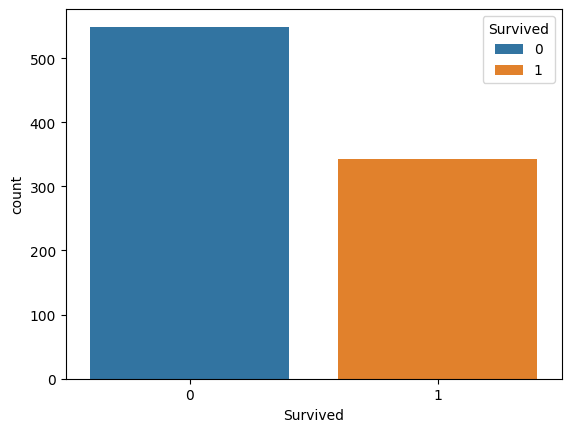

In [137]:
# Plot for Survived
sns.countplot(data=titanic_data,x='Survived',hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

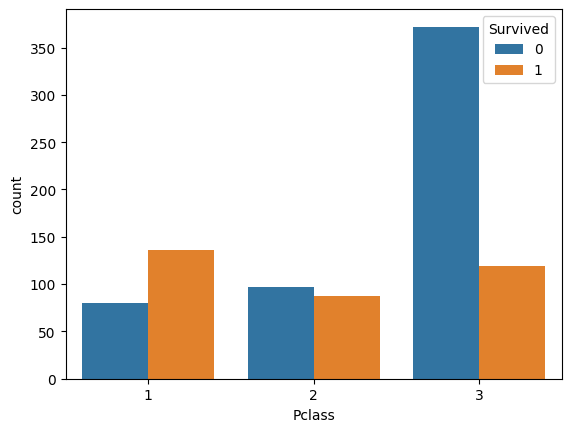

In [138]:
# Plot for Pclass
sns.countplot(data=titanic_data,x='Pclass',hue='Survived')

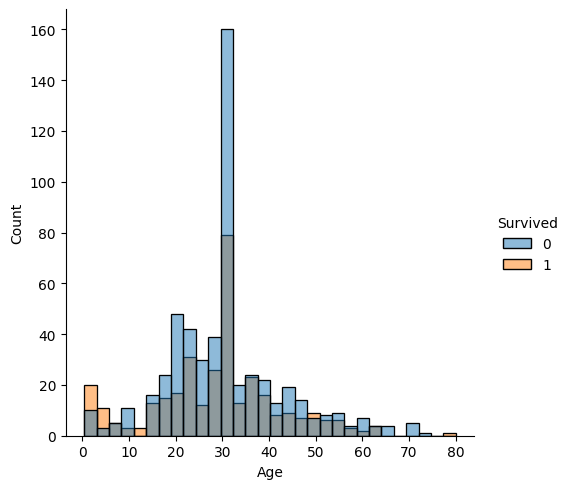

In [139]:
# plot for age
sns.displot(data=titanic_data,x='Age',hue='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

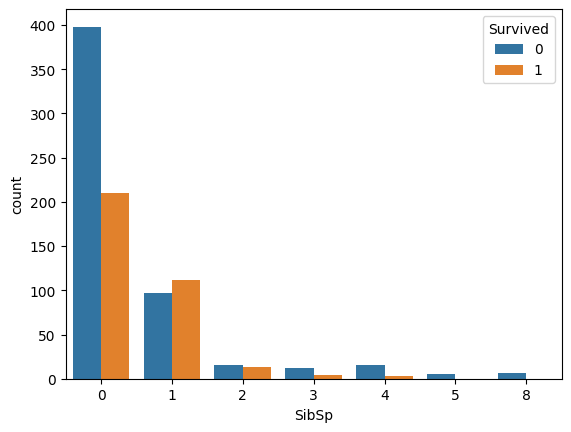

In [140]:
# Number  of siblings / spouses aboard the Titanic
sns.countplot(data=titanic_data,x ='SibSp', hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

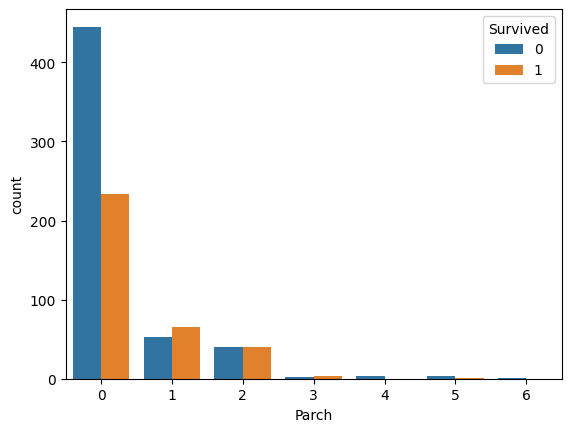

In [141]:
# of parents / children aboard the Titanic
sns.countplot(data=titanic_data,x ='Parch', hue='Survived')

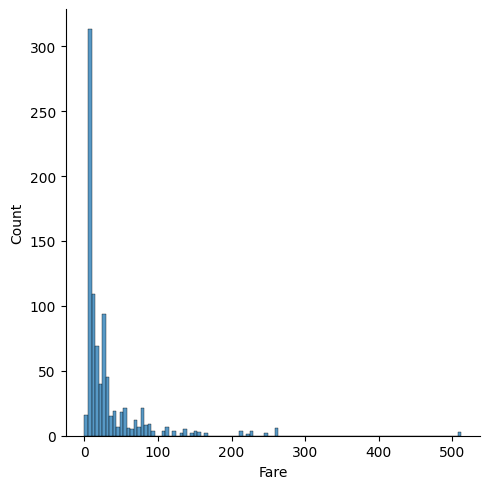

In [142]:
#Passenger fare
sns.displot(data=titanic_data,x ='Fare')

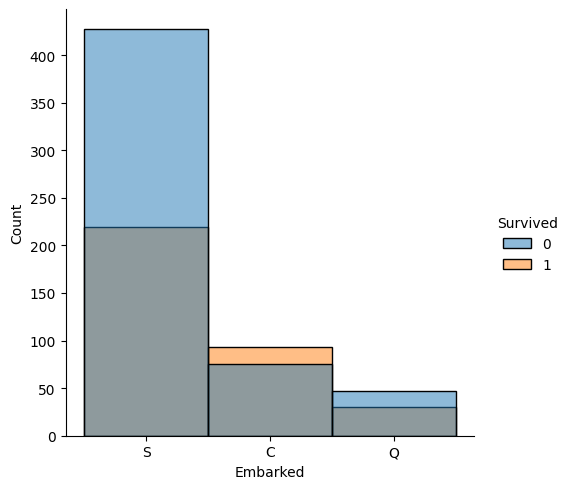

In [143]:
sns.displot(data=titanic_data,x='Embarked',hue='Survived')

In [144]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Data Preprocessing

In [145]:
# setup lable encoder
le = LabelEncoder()

In [146]:
titanic_data['Embarked'] = le.fit_transform(titanic_data['Embarked'])
test_titanic_data['Embarked'] = le.fit_transform(test_titanic_data['Embarked'])

In [147]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,2


In [148]:
test_titanic_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,2
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,1
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,2
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,2


In [149]:
titanic_data['Embarked'].value_counts()

,count
Embarked,
2,646
0,168
1,77


## Embarked
S	- 2 ,
C	-  0,
Q	- 1


In [150]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [151]:
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])
test_titanic_data['Sex'] = le.fit_transform(test_titanic_data['Sex'])

In [152]:
titanic_data['Sex'].value_counts()

,count
Sex,
1,577
0,314


male	- 1
female	- 0


In [153]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [154]:
test_titanic_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,2
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,1
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,2
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,2


In [155]:
!pip install nameparser

In [156]:
# extracting the titles from their names
from nameparser import HumanName
def extract_title(name):
    parsed_name = HumanName(name)
    return parsed_name.title if parsed_name.title else None

# creating new column for title
titanic_data['Title'] = titanic_data['Name'].apply(extract_title)
test_titanic_data['Title'] = test_titanic_data['Name'].apply(extract_title)

In [157]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,Mrs.
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,Mrs.
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,Mr.


In [158]:
test_titanic_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,1,Mr.
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,2,Mrs.
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,1,Mr.
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,2,Mr.
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,2,Mrs.


In [159]:
titanic_data['Title'].value_counts()

,count
Title,
Mr.,517
Miss.,182
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Col.,2
Mlle.,2
Mme.,1


In [160]:
titanic_data['Title'].isnull().sum()

np.int64(4)

In [161]:
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Title,4


In [162]:
titanic_data[['Title']] = imp_mode.fit_transform(titanic_data[['Title']])
test_titanic_data[['Title']] = imp_mode.fit_transform(test_titanic_data[['Title']])

In [163]:
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Title,4


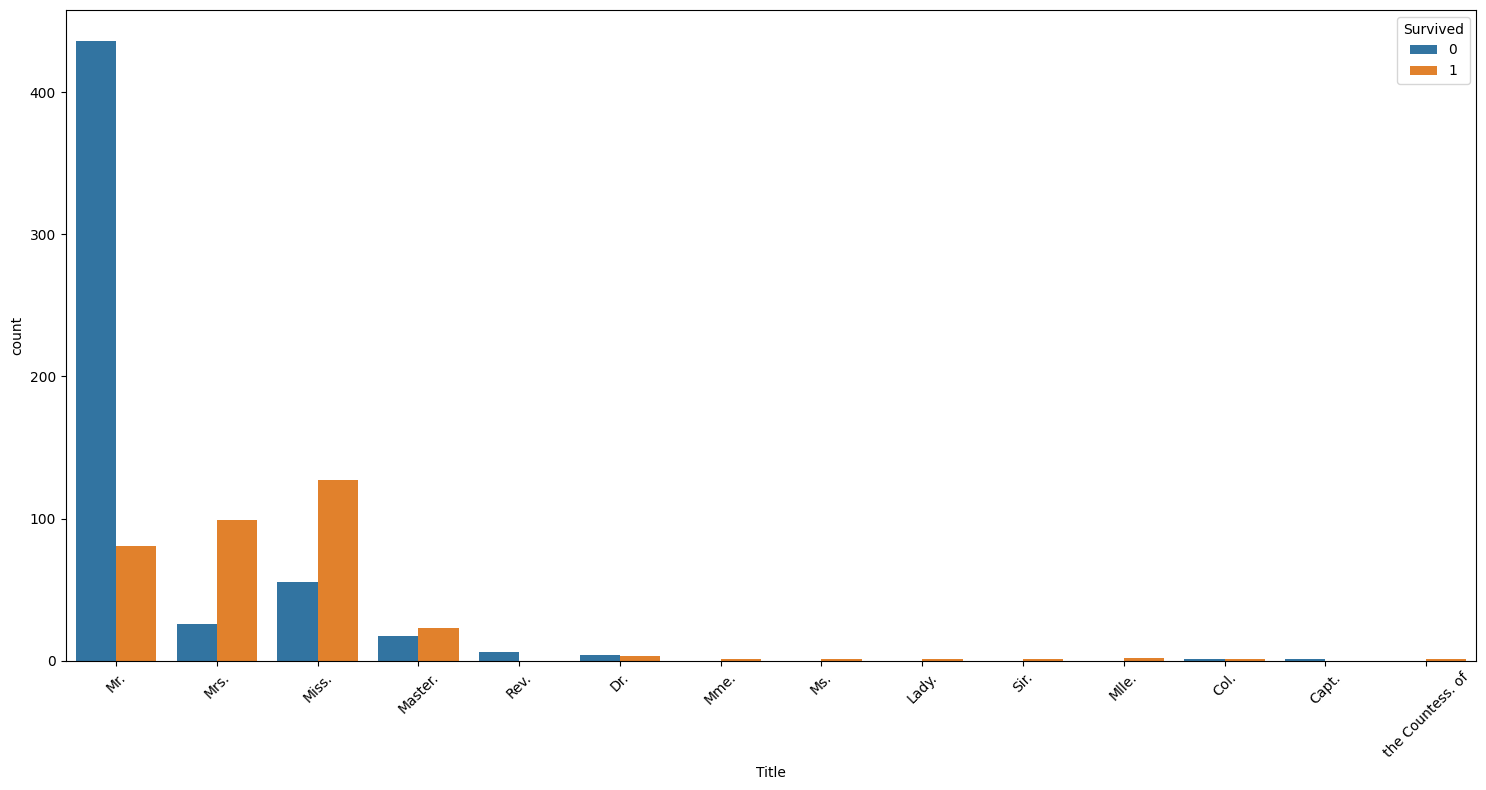

In [164]:
plt.figure(figsize=(15, 8))
sns.countplot(data=titanic_data, x='Title', hue='Survived')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()  # Adjust layout to prevent cutting off labels
plt.show()

In [165]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,Mrs.
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,Mrs.
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,Mr.


In [166]:
titanic_data.drop('Name',axis=1,inplace= True)
test_titanic_data.drop('Name',axis=1,inplace= True)

In [49]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2,Mr.
1,1,1,0,38.0,1,0,71.2833,0,Mrs.
2,1,3,0,26.0,0,0,7.9250,2,Miss.
3,1,1,0,35.0,1,0,53.1000,2,Mrs.
4,0,3,1,35.0,0,0,8.0500,2,Mr.


In [167]:
test_titanic_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,34.5,0,0,7.8292,1,Mr.
1,3,0,47.0,1,0,7.0000,2,Mrs.
2,2,1,62.0,0,0,9.6875,1,Mr.
3,3,1,27.0,0,0,8.6625,2,Mr.
4,3,0,22.0,1,1,12.2875,2,Mrs.


In [168]:
#Lable encoding the title column

titanic_data['Title'] = le.fit_transform(titanic_data['Title'])
test_titanic_data['Title'] = le.fit_transform(test_titanic_data['Title'])

In [169]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2,8
1,1,1,0,38.0,1,0,71.2833,0,9
2,1,3,0,26.0,0,0,7.9250,2,5
3,1,1,0,35.0,1,0,53.1000,2,9
4,0,3,1,35.0,0,0,8.0500,2,8


In [170]:
# Correlation amonsgt features

titanic_data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675,-0.213855
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098,-0.041143
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262,0.294702
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749,0.358282
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230,-0.226428
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798,-0.153446
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719,-0.084381
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000,0.065322
Title,-0.213855,-0.041143,0.294702,0.358282,-0.226428,-0.153446,-0.084381,0.065322,1.000000


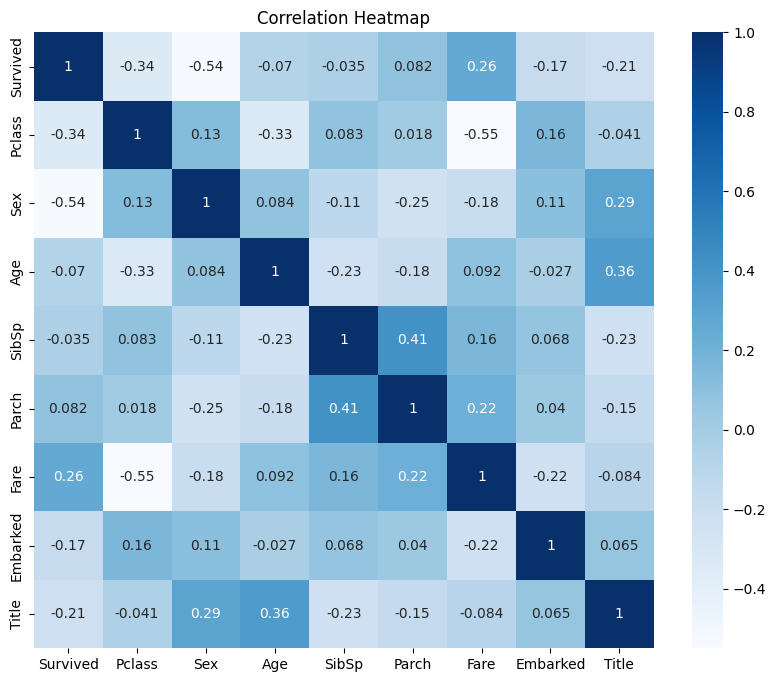

In [171]:
# correlation heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(titanic_data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [172]:
# Split features and Target columns

X = titanic_data.drop('Survived',axis =1)
y = titanic_data['Survived']

In [173]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,22.0,1,0,7.2500,2,8
1,1,0,38.0,1,0,71.2833,0,9
2,3,0,26.0,0,0,7.9250,2,5
3,1,0,35.0,1,0,53.1000,2,9
4,3,1,35.0,0,0,8.0500,2,8


In [180]:
test_titanic_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,34.5,0,0,7.8292,1,4
1,3,0,47.0,1,0,7.0000,2,5
2,2,1,62.0,0,0,9.6875,1,4
3,3,1,27.0,0,0,8.6625,2,4
4,3,0,22.0,1,1,12.2875,2,5


In [174]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Feature Scaling

In [176]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476,7.324355
std,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503,1.737641
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,5.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000,8.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,8.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,14.000000


In [177]:
scaler = StandardScaler()

In [182]:
X_scaled_data = scaler.fit_transform(X)

kaggle_test_scaled_data = scaler.fit_transform(test_titanic_data)

In [183]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title'], dtype='object')

In [185]:
test_titanic_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title'], dtype='object')

In [186]:
scaled_df = pd.DataFrame(X_scaled_data, columns=X.columns)
kaggle_scaled_df = pd.DataFrame(kaggle_test_scaled_data, columns=test_titanic_data.columns)

In [187]:
scaled_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.585954,0.389048
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.942303,0.964864
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,0.585954,-1.338401
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,0.585954,0.964864
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,0.585954,0.389048


In [188]:
kaggle_scaled_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.873482,0.755929,0.334993,-0.499470,-0.400248,-0.498407,-0.470915,0.131049
1,0.873482,-1.322876,1.325530,0.616992,-0.400248,-0.513274,0.700767,1.296553
2,-0.315819,0.755929,2.514175,-0.499470,-0.400248,-0.465088,-0.470915,0.131049
3,0.873482,0.755929,-0.259330,-0.499470,-0.400248,-0.483466,0.700767,0.131049
4,0.873482,-1.322876,-0.655545,0.616992,0.619896,-0.418471,0.700767,1.296553


In [63]:
scaled_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-8.772133e-17,-1.156327e-16,2.232906e-16,4.386066e-17,5.382900e-17,3.987333e-18,-4.984166e-17,1.435440e-16
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.566107e+00,-1.355574e+00,-2.253155e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-1.942303e+00,-4.217482e+00
25%,-3.693648e-01,-1.355574e+00,-5.924806e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-6.781745e-01,-1.338401e+00
50%,8.273772e-01,7.376951e-01,0.000000e+00,-4.745452e-01,-4.736736e-01,-3.573909e-01,5.859541e-01,3.890475e-01
75%,8.273772e-01,7.376951e-01,4.079260e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,5.859541e-01,3.890475e-01
max,8.273772e-01,7.376951e-01,3.870872e+00,6.784163e+00,6.974147e+00,9.667167e+00,5.859541e-01,3.843945e+00


### Train Test Split

In [64]:
X_train, X_test, y_train,y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42, stratify=y)

In [65]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


### Hyperparameter Tunning

In [71]:
# Define Models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

In [74]:
# Define  Hyperparameter Grids
param_grids = {
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 300],
        'learning_rate': [0.05,0.1],
        'random_state':[50,100]
    }
}

In [77]:
results_list = []

# Perform Hyperparameter Tuning and Collect Results
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    results_list.append({
        'Model': model_name,
        'Best Score': grid_search.best_score_,
        'Best Params': grid_search.best_params_
    })


In [78]:
results_list

[{'Model': 'LogisticRegression',
  'Best Score': np.float64(0.8034275583571358),
  'Best Params': {'C': 0.1, 'solver': 'lbfgs'}},
 {'Model': 'RandomForestClassifier',
  'Best Score': np.float64(0.8231261696050428),
  'Best Params': {'max_depth': 10, 'n_estimators': 50}},
 {'Model': 'GradientBoostingClassifier',
  'Best Score': np.float64(0.8287698217275681),
  'Best Params': {'learning_rate': 0.1,
   'n_estimators': 300,
   'random_state': 50}}]

In [79]:
# Create a Pandas DataFrame
results_df = pd.DataFrame(results_list)


print(results_df.sort_values(by='Best Score', ascending=False))

                        Model  Best Score  \
2  GradientBoostingClassifier    0.828770   
1      RandomForestClassifier    0.823126   
0          LogisticRegression    0.803428   

                                         Best Params  
2  {'learning_rate': 0.1, 'n_estimators': 300, 'r...  
1              {'max_depth': 10, 'n_estimators': 50}  
0                      {'C': 0.1, 'solver': 'lbfgs'}  


In [83]:
# Analyze the DataFrame
results_df.sort_values(by="Best Score", ascending = False)

,Model,Best Score,Best Params
2,GradientBoostingClassifier,0.828770,"{'learning_rate': 0.1, 'n_estimators': 300, 'r..."
1,RandomForestClassifier,0.823126,"{'max_depth': 10, 'n_estimators': 50}"
0,LogisticRegression,0.803428,"{'C': 0.1, 'solver': 'lbfgs'}"


## Selected Model -
  Gradient Boosting Classifier
  
## Params
        'n_estimators' = 300,
        'learning_rate' =  0.1,
        'random_state' = 50




In [85]:
# Selected Model
gbc_model = GradientBoostingClassifier()

In [86]:
# Fitting training data to model
gbc_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [87]:
# Generating Predictions for training data
train_model_predictions= gbc_model.predict(X_train)

In [90]:
# Accuracy score on Training data
train_acc = accuracy_score(train_model_predictions,y_train)

In [93]:
# Printing the Accuracy score on the training data
print('Accuracy score for Train Data is :', train_acc)

Accuracy score for Train Data is : 0.9185393258426966


In [94]:
# Predicting score on Test data

test_model_predictions = gbc_model.predict(X_test)

In [96]:
# Accuracy score on Test data

test_acc = accuracy_score(test_model_predictions,y_test)

In [97]:
# Print the accuracy score on test data

print('Accuracy score on Test Data is :' , test_acc)

Accuracy score on Test Data is : 0.8156424581005587


In [99]:
confusion_matrix(test_model_predictions,y_test)

array([[100,  23],
       [ 10,  46]])

In [100]:
cm = pd.DataFrame(confusion_matrix(test_model_predictions,y_test))

<Axes: >

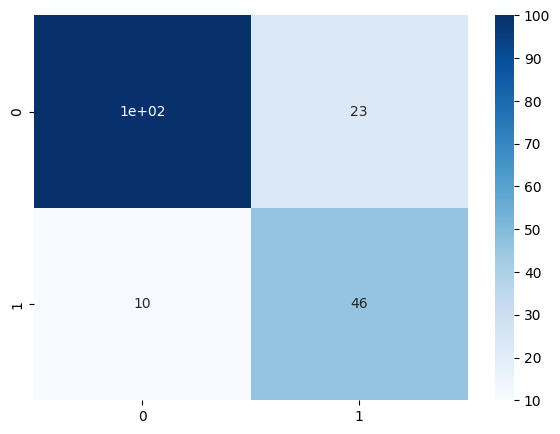

In [106]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm,annot=True, cmap='Blues')

In [108]:
print(classification_report(test_model_predictions,y_test))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       123
           1       0.67      0.82      0.74        56

    accuracy                           0.82       179
   macro avg       0.79      0.82      0.80       179
weighted avg       0.83      0.82      0.82       179



#### Kaggle Test Data Predictions

In [189]:
kaggle_scaled_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.873482,0.755929,0.334993,-0.499470,-0.400248,-0.498407,-0.470915,0.131049
1,0.873482,-1.322876,1.325530,0.616992,-0.400248,-0.513274,0.700767,1.296553
2,-0.315819,0.755929,2.514175,-0.499470,-0.400248,-0.465088,-0.470915,0.131049
3,0.873482,0.755929,-0.259330,-0.499470,-0.400248,-0.483466,0.700767,0.131049
4,0.873482,-1.322876,-0.655545,0.616992,0.619896,-0.418471,0.700767,1.296553


In [190]:
# Predicting kaggle data

kaggle_prediction = gbc_model.predict(kaggle_scaled_df)

In [191]:
kaggle_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [193]:
kaggle_submission = pd.read_csv('/content/test.csv')

In [194]:
kaggle_submission.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [195]:
kaggle_submission_passID = kaggle_submission['PassengerId']

In [210]:
kaggle_submission_passID.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [216]:
kaggle_submission_predictions = pd.DataFrame(kaggle_prediction)

In [220]:
kaggle_submission_predictions.rename(columns={0: 'Survived'}, inplace=True)

In [221]:
kaggle_submission_predictions.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [222]:
final_submission = pd.concat([kaggle_submission_passID,kaggle_submission_predictions],axis=1)
final_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [223]:
final_submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [225]:
final_submission.to_csv('kaggle_titanic_submission.csv', index=False)